# Advanced Operations in LangChain
* Notebook by Adam Lang
* Date: 6/20/2024
* We will cover advanced operations in LangChain and for LLMs in general including:
1. Tracking costs
2. Caching
3. Streaming live results

## Tracking costs
* most commercial LLMs like ChatGPT charge based on number of tokens you use.
* LangChain allows easy tracking of tokens per LLM API call.
* At this time only OpenAI tracking is in langchain.

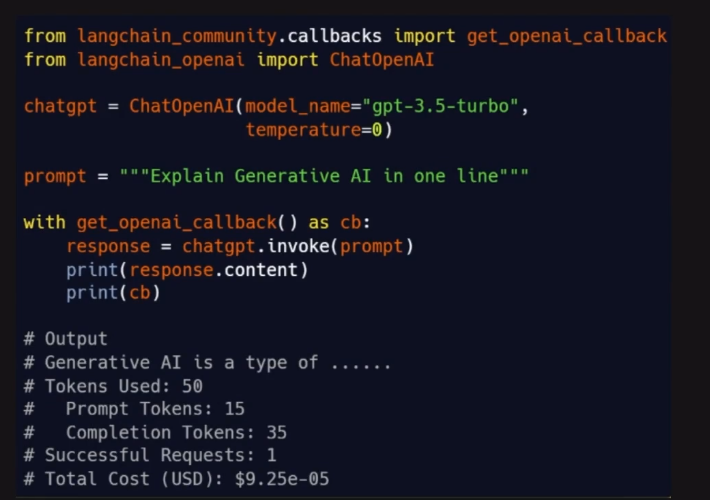


* Main difference is the `invoke(prompt)` call is used within the `get_openai_callback()`
* The call back (cb) gives you tracking.

## Caching
* optional caching is available.
* saves cost via reducing number of LLM calls especially if you are very often requesting the same prompts over and over again.
* response time will be much faster when requesting the same prompt.
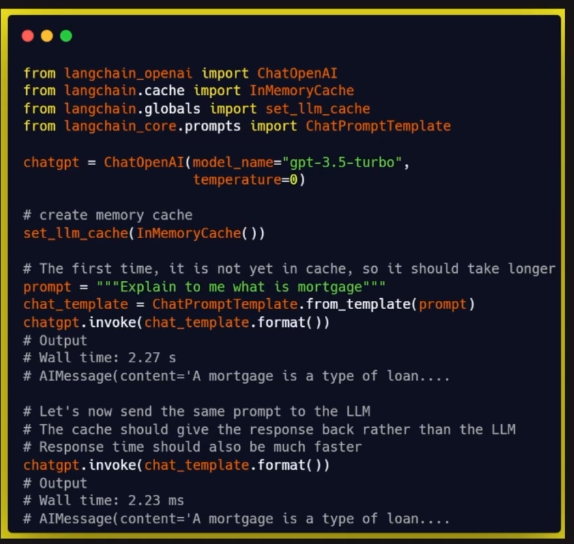

* Storing the same prompt utilized over and over again in a cache will save API token costs!!!!
  * This way you get this from the cache stored in memory rather than calling the LLM over and over again and accumulating costs.
  * We can see this above the response time was 2.3 ms much faster than the 1st call which was 2.27 s because we called the cache and not the LLM API.

## Streaming Data
* LangChain allows you to implement its LLM APIs in a runnable interface which comes with implementations of methods for streming like and astream.
* All LLMs have basic support for streaming data.
* This enables an organization or user to stream LLM responses live instead of having to wait for full responses to return prior to showing it.
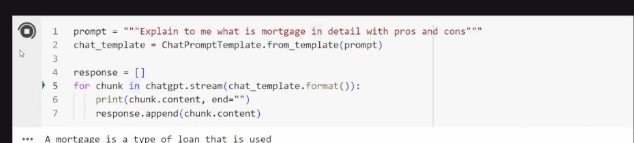

* **Main difference**: instead of using the `.invoke(prompt)` function we are using `.stream()` which gives immediate live response from LLM.

# Implementation in LangChain
1. LLM cost monitoring
2. Caching
3. Streaming results

In [1]:
## install dependencies
!pip install langchain==0.1.19
!pip install langchain==0.1.6
!pip install langchain-community==0.0.38
#!pip install langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.8/811.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with ot

In [5]:
!pip install langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.1.52
    Uninstalling langchain-core-0.1.52:
      Successfully uninstalled langchain-core-0.1.52
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.1.6 requires langchain-core<0.2,>=0.1.22, but you have langchain-core 0.2.9 which is incompatible.
langchain 0.1.6 requires langsmith<0.1,>=0

## API tokens for OpenAI

In [6]:
from getpass import getpass

OPENAI_KEY = getpass('Enter your Open AI API key: ')

Enter your Open AI API key: ··········


In [7]:
## system variables
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## ChatGPT model instantiate

In [8]:
from langchain_openai import ChatOpenAI

#model
chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

# Tracking LLM Costs
* usually tracked by token usage.

In [9]:
from langchain_community.callbacks import get_openai_callback

# set up prompt
prompt = """Explain the history of generative AI in one line."""

## setup callback function
with get_openai_callback() as cb:
  response = chatgpt.invoke(prompt)
  print(response.content)
  print(cb) #print callback

Generative AI has evolved from early rule-based systems to sophisticated neural networks capable of creating realistic and novel content.
Tokens Used: 41
	Prompt Tokens: 19
	Completion Tokens: 22
Successful Requests: 1
Total Cost (USD): $7.25e-05


In [10]:
# total callbakc tokens
cb.total_tokens

41

In [12]:
## prompt tokens, completion tokens
print(f"Prompt tokens are: {cb.prompt_tokens}")
print(f"Completion tokens are: {cb.completion_tokens}")
#cb.prompt_tokens, cb.completion_tokens

Prompt tokens are: 19
Completion tokens are: 22


In [13]:
## total cost
print(f"Total cost is: {cb.total_cost}")

Total cost is: 7.25e-05


# Caching in LangChain
* LangChain has an optional caching layer for LLM APIs.
* Why is this beneficial?
1. **Cost Efficiency**: caching responses allows you to reduce the number of API calls to commerical LLMs. This is very helpful if you are sending the same questions or prompts to the LLM over and over again, the cost adds up over time. By storing these consistent prompts in cache memory you save an LLM call.
2. **Performance Improvement**: caching enhances your application's speed by decreasing the overall need for repetitive API calls to the LLM provider making interactions quicker and more efficient in the end.

### InMemoryCache
* We will be timing the retrieval
* There are multiple caches available in the langchain community for multiple data stores and databases see docs: https://api.python.langchain.com/en/latest/community_api_reference.html#module-langchain_community.cache

In [14]:
%%time

from langchain.cache import InMemoryCache
from langchain.globals import set_llm_cache

# set llm cache
set_llm_cache(InMemoryCache())

## the first API call is NOT in cache so it takes longer, then it speeds up once in cache storage

from langchain_core.prompts import ChatPromptTemplate

# prompt
prompt = """Explain to me what the hypothalamus is."""

## chat_template
chat_template = ChatPromptTemplate.from_template(prompt)

# invoke response
chatgpt.invoke(chat_template.format())


CPU times: user 563 ms, sys: 43 ms, total: 606 ms
Wall time: 2.39 s


AIMessage(content='The hypothalamus is a small region of the brain located below the thalamus and above the pituitary gland. It plays a crucial role in regulating various bodily functions, including temperature regulation, hunger and thirst, sleep-wake cycles, and hormone production. The hypothalamus also helps to control emotions and behavior, as well as the release of hormones from the pituitary gland. It acts as a link between the nervous system and the endocrine system, helping to maintain homeostasis in the body.', response_metadata={'token_usage': {'completion_tokens': 104, 'prompt_tokens': 19, 'total_tokens': 123}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-0d1ccfbc-9701-4251-bf01-a4532ac0df1d-0', usage_metadata={'input_tokens': 19, 'output_tokens': 104, 'total_tokens': 123})

In [15]:
%%time
# the second LLM API call now goes faster -->
chatgpt.invoke(chat_template.format())

CPU times: user 2.39 ms, sys: 907 µs, total: 3.29 ms
Wall time: 3.35 ms


AIMessage(content='The hypothalamus is a small region of the brain located below the thalamus and above the pituitary gland. It plays a crucial role in regulating various bodily functions, including temperature regulation, hunger and thirst, sleep-wake cycles, and hormone production. The hypothalamus also helps to control emotions and behavior, as well as the release of hormones from the pituitary gland. It acts as a link between the nervous system and the endocrine system, helping to maintain homeostasis in the body.', response_metadata={'token_usage': {'completion_tokens': 104, 'prompt_tokens': 19, 'total_tokens': 123}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-0d1ccfbc-9701-4251-bf01-a4532ac0df1d-0', usage_metadata={'input_tokens': 19, 'output_tokens': 104, 'total_tokens': 123})

### SQLite Cache
* Storing cache in memory can be expensive and take up space so lets show another way to do this.

In [16]:
# remove cache if already exists, ignore if get an error message below, that is normal (when cache doesnt exist)
!rm langchain.db

rm: cannot remove 'langchain.db': No such file or directory


In [17]:
# we can do the same thing with a SQLite cache
from langchain.cache import SQLiteCache ## stores cache in SQLite database

#create cache and store in SQLite database
set_llm_cache(SQLiteCache(database_path="langchain.db"))

In [18]:
%%time

# fist time the prompt is not yet in cache so it will take longer
prompt = """Please explain to me what stockholder equity is"""

# chat template
chat_template = ChatPromptTemplate.from_template(prompt)

# invoke response
chatgpt.invoke(chat_template.format())

CPU times: user 57.1 ms, sys: 5.23 ms, total: 62.3 ms
Wall time: 2.63 s


AIMessage(content="Stockholder equity, also known as shareholders' equity, is the amount of a company's assets that are financed by its shareholders through the purchase of stock. It represents the difference between a company's total assets and total liabilities. In other words, it is the net worth of the company that belongs to its shareholders. Stockholder equity is an important measure of a company's financial health and stability, as it shows how much of the company's assets are owned by shareholders rather than creditors. It is also used to calculate important financial ratios, such as return on equity, which can help investors assess the profitability and efficiency of a company.", response_metadata={'token_usage': {'completion_tokens': 126, 'prompt_tokens': 18, 'total_tokens': 144}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-7452a180-4a6a-4295-8ddd-d560392f6e5a-0', usage_metadata={'input_tokens': 18, 'output_to

In [19]:
## second call this time from cache --> will be quicker
%%time

chatgpt.invoke(chat_template.format())

CPU times: user 84.5 ms, sys: 26.1 ms, total: 111 ms
Wall time: 206 ms


AIMessage(content="Stockholder equity, also known as shareholders' equity, is the amount of a company's assets that are financed by its shareholders through the purchase of stock. It represents the difference between a company's total assets and total liabilities. In other words, it is the net worth of the company that belongs to its shareholders. Stockholder equity is an important measure of a company's financial health and stability, as it shows how much of the company's assets are owned by shareholders rather than creditors. It is also used to calculate important financial ratios, such as return on equity, which can help investors assess the profitability and efficiency of a company.", response_metadata={'token_usage': {'completion_tokens': 126, 'prompt_tokens': 18, 'total_tokens': 144}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-7452a180-4a6a-4295-8ddd-d560392f6e5a-0', usage_metadata={'input_tokens': 18, 'output_to

Summary
* We can see it is much faster.

# Streaming Data for LLMs
* All LLMs in LangChain have a **Runnable** interface which allows default methods such as **invoke**, **batch**, **abatch**, **stream**, and **astream**.
* This equips LLMs with basic streaming capabilities.

## Default Streaming functions:
* **Synchronous Streaming**: by default, streaming operations return an **Iterator** that yields a single value the final result from the LLM.
* **Asynchronous Streaming**: in a similar manner, async streaming defaults to returning an **AsyncIterator** with final result.

### Limitations:
* The default implementations do not suppport token by token streaming.
* For that type of streaming, an LLM provider like openaAI must offer that support.

In [20]:
## prompt
prompt = """Explain to me what refinancing student loans means in detail with pros and cons"""
## template
chat_template = ChatPromptTemplate.from_template(prompt)

# loop through chunks
for chunk in chatgpt.stream(chat_template.format()):
  print(chunk.content)


Ref
in
ancing
 student
 loans
 refers
 to
 the
 process
 of
 taking
 out
 a
 new
 loan
 to
 pay
 off
 existing
 student
 loans
.
 This
 new
 loan
 typically
 comes
 with
 a
 lower
 interest
 rate
,
 different
 repayment
 terms
,
 or
 both
.
 


Pros
 of
 refin
ancing
 student
 loans
:

1
.
 Lower
 interest
 rates
:
 By
 refin
ancing
,
 you
 may
 be
 able
 to
 secure
 a
 lower
 interest
 rate
,
 which
 can
 save
 you
 money
 over
 the
 life
 of
 the
 loan
.

2
.
 Simpl
ified
 repayment
:
 Ref
in
ancing
 allows
 you
 to
 combine
 multiple
 loans
 into
 one
,
 making
 it
 easier
 to
 manage
 your
 monthly
 payments
.

3
.
 Flexible
 repayment
 options
:
 Some
 refin
ancing
 lenders
 offer
 flexible
 repayment
 options
,
 such
 as
 income
-driven
 repayment
 plans
 or
 extended
 repayment
 terms
.

4
.
 Potential
 for
 lower
 monthly
 payments
:
 With
 a
 lower
 interest
 rate
 or
 extended
 repayment
 term
,
 you
 may
 be
 able
 to
 lower
 your
 monthly
 payments
.


Cons
 of
 refin
anci

In [21]:
## prompt
prompt = """Explain to me what refinancing student loans means in detail with pros and cons"""
## template
chat_template = ChatPromptTemplate.from_template(prompt)

# store response in list
response = []
for chunk in chatgpt.stream(chat_template.format()):
  print(chunk.content, end="")
  response.append(chunk.content)

Refinancing student loans refers to the process of taking out a new loan to pay off existing student loans. This new loan typically comes with a lower interest rate, different repayment terms, or both. 

Pros of refinancing student loans:
1. Lower interest rates: By refinancing, you may be able to secure a lower interest rate, which can save you money over the life of the loan.
2. Simplified repayment: Refinancing can consolidate multiple student loans into one, making it easier to manage and keep track of payments.
3. Lower monthly payments: Refinancing can also potentially lower your monthly payments, giving you more flexibility in your budget.
4. Improved credit score: Making timely payments on a refinanced loan can help improve your credit score over time.

Cons of refinancing student loans:
1. Loss of federal loan benefits: If you refinance federal student loans with a private lender, you may lose certain benefits such as income-driven repayment plans, loan forgiveness programs, a

In [22]:
## now we can see some of the chunks in the list
response[:15]

['',
 'Ref',
 'in',
 'ancing',
 ' student',
 ' loans',
 ' refers',
 ' to',
 ' the',
 ' process',
 ' of',
 ' taking',
 ' out',
 ' a',
 ' new']

In [23]:
## we can join the chunks together
print(''.join(response))

Refinancing student loans refers to the process of taking out a new loan to pay off existing student loans. This new loan typically comes with a lower interest rate, different repayment terms, or both. 

Pros of refinancing student loans:
1. Lower interest rates: By refinancing, you may be able to secure a lower interest rate, which can save you money over the life of the loan.
2. Simplified repayment: Refinancing can consolidate multiple student loans into one, making it easier to manage and keep track of payments.
3. Lower monthly payments: Refinancing can also potentially lower your monthly payments, giving you more flexibility in your budget.
4. Improved credit score: Making timely payments on a refinanced loan can help improve your credit score over time.

Cons of refinancing student loans:
1. Loss of federal loan benefits: If you refinance federal student loans with a private lender, you may lose certain benefits such as income-driven repayment plans, loan forgiveness programs, a